In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf
import ast

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import altair as alt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
filePath = r'https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/immobilienNuernberg_cleaned.csv'
df = pd.read_csv(filePath)

In [3]:
df['constructionYear'] = pd.to_numeric(df['constructionYear'])
df['livingSpace'] = pd.to_numeric(df['livingSpace'])
df['energyEfficiency'] = df['energyEfficiency'].astype('category')
df['photosCount'] = pd.to_numeric(df['photosCount'])
df['localAmenitiesScore'] = pd.to_numeric(df['localAmenitiesScore'])
df['localMobilityScore'] = pd.to_numeric(df['localMobilityScore'])
df['latitudeDistrict'] = pd.to_numeric(df['latitudeDistrict'])
df['longitudeDistrict'] = pd.to_numeric(df['longitudeDistrict'])
df['district'] = df['district'].astype('category')
df['price'] = pd.to_numeric(df['price'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['energyClass'] = df['energyClass'].astype('category')
df['energySources'] = df['energySources'].astype('category')
df['energyEfficiency'] = df['energyEfficiency'].astype('category')
df['elevator'] = df['elevator'].astype('category')
df['sauna'] = df['sauna'].astype('category')
df['swimmingpool'] = df['swimmingpool'].astype('category')
df['kitchenEqipped'] = df['kitchenEqipped'].astype('category')
df['cellar'] = df['cellar'].astype('category')
df['storageRoom'] = df['storageRoom'].astype('category')
df['wheelchairAccessible'] = df['wheelchairAccessible'].astype('category')
df['assistedLiving'] = df['assistedLiving'].astype('category')
df['parkingSlots'] = df['parkingSlots'].astype('category')
df['guestToilet'] = df['guestToilet'].astype('category')
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].astype('category')
df['chimney'] = df['chimney'].astype('category')
df['attics'] = df['attics'].astype('category')

In [4]:
# Zeige die ersten Zeilen
pd.set_option('display.max_columns', None)
df.head()

,location,Northeast,Northwest,Southeast,Southwest,energyEfficiency,price,constructionYear,livingSpace,energySources,photosCount,localAmenitiesScore,localMobilityScore,latitudeDistrict,longitudeDistrict,distanceToCenter,district,rooms,energyClass,elevator,sauna,swimmingpool,kitchenEqipped,cellar,storageRoom,wheelchairAccessible,assistedLiving,parkingSlots,guestToilet,privateOutdoorSpace,chimney,attics
0,2,0,1,0,0,1,483623.0,2023.0,82.81,9.0,6.0,8.2,9.6,49.46008,11.04266,2.615535,Seeleinsbühl,3.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
1,2,0,1,0,0,1,433956.0,2023.0,75.52,9.0,6.0,8.2,9.6,49.46008,11.04266,2.615535,Seeleinsbühl,3.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0
2,2,0,1,0,0,1,251000.0,2023.0,46.77,9.0,6.0,8.2,9.6,49.46008,11.04266,2.615535,Seeleinsbühl,2.0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
3,2,0,1,0,0,1,255000.0,2023.0,46.77,9.0,6.0,8.2,9.6,49.46008,11.04266,2.615535,Seeleinsbühl,2.0,1,1,0,0,0,1,0,0,0,0,0,1,0,0
4,2,0,1,0,0,1,447710.0,2023.0,83.76,9.0,5.0,8.2,9.6,49.46008,11.04266,2.615535,Seeleinsbühl,3.0,1,1,0,0,0,0,1,0,0,0,0,1,0,0


In [5]:
df.drop('district', axis=1, inplace=True)

In [6]:
# Entfernen von Zeilen mit fehlenden Werten in 'energyClass'
df_new = df.dropna(subset=['energyClass'])

# Modell 2: 'energyEfficiency' als abhängige Variable
X_energy = df_new.drop('energyEfficiency', axis=1)
y_energy = df_new['energyEfficiency']

# Aufteilen der Daten für das Modell mit 'energyEfficiency' als abhängige Variable
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(
    X_energy, y_energy, test_size=0.2, random_state=42, stratify=df_new['energyClass'])

df_train_energy = pd.concat([X_train_energy, y_train_energy], axis=1)

print("X_train_energy:", X_train_energy.shape)
print("X_test_energy:", X_test_energy.shape)

X_train_energy: (490, 30)
X_test_energy: (123, 30)


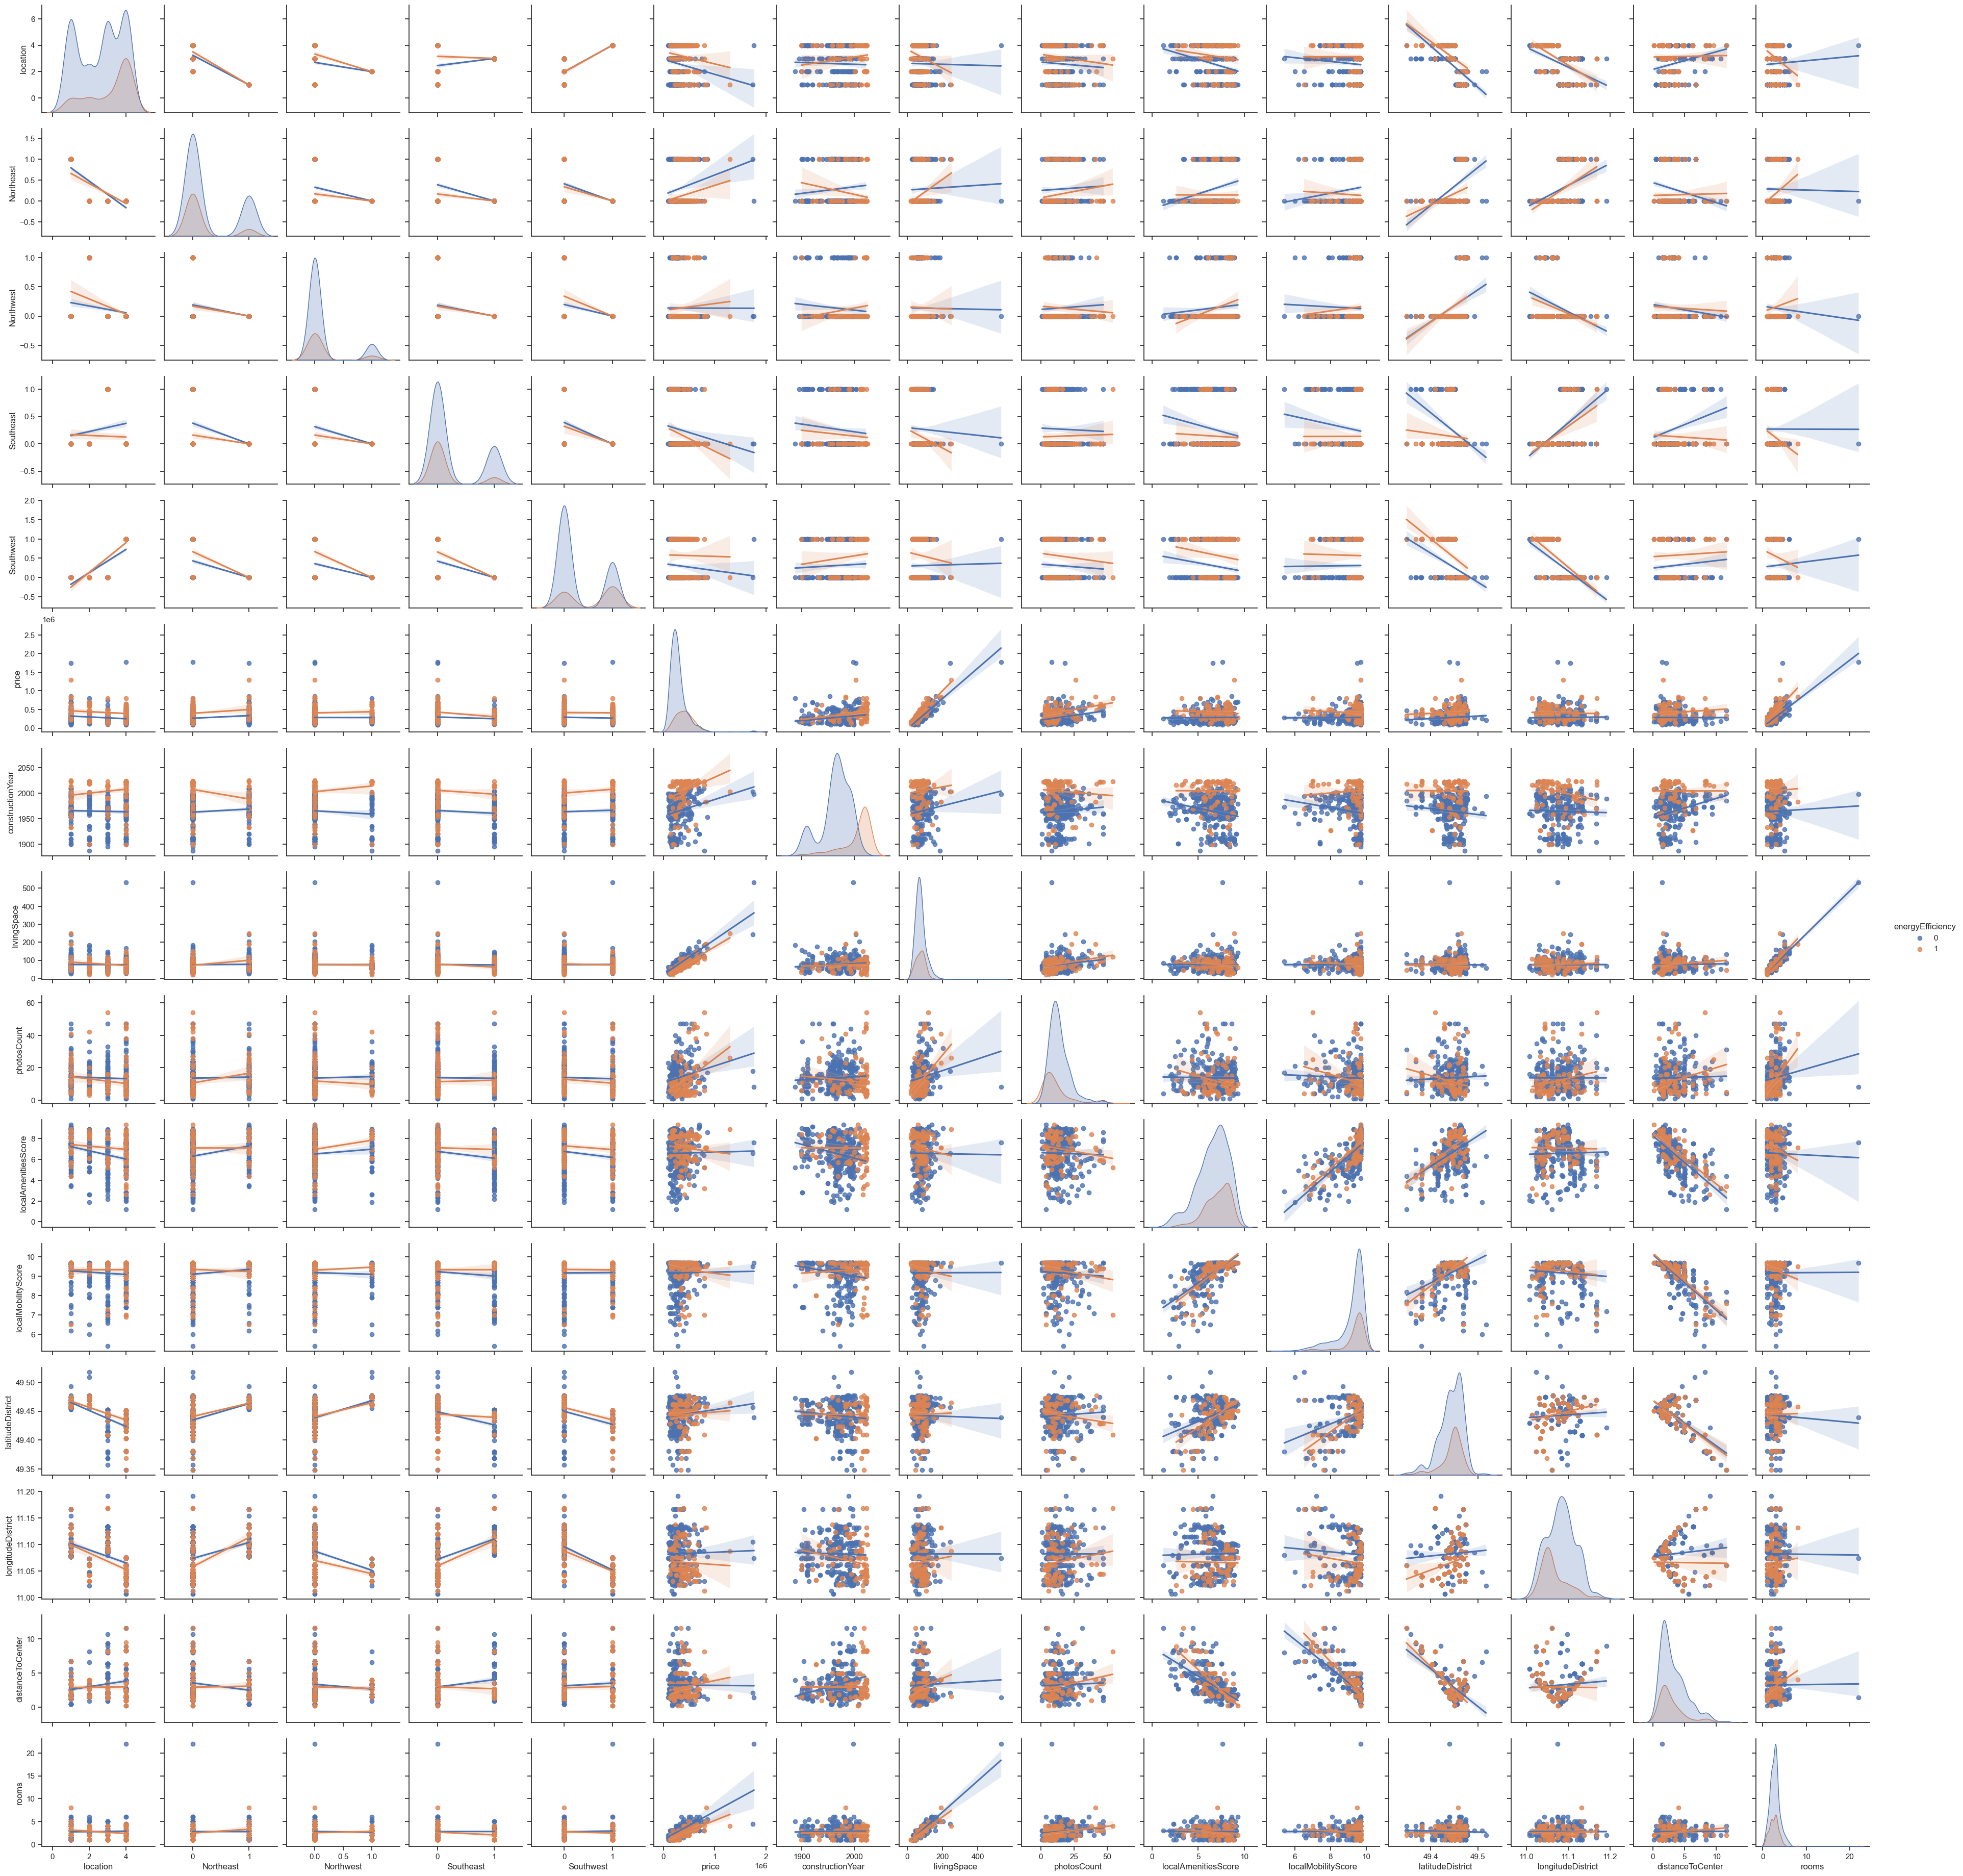

In [7]:
# 'energyEfficiency'
sns.pairplot(hue='energyEfficiency', kind="reg", diag_kind="kde", data=df_train_energy)

In [8]:
df.corr(numeric_only=True).round(2).style.background_gradient("GnBu")

,location,Northeast,Northwest,Southeast,Southwest,price,constructionYear,livingSpace,photosCount,localAmenitiesScore,localMobilityScore,latitudeDistrict,longitudeDistrict,distanceToCenter,rooms
location,1.000000,-0.840000,-0.240000,0.110000,0.820000,-0.100000,0.140000,-0.070000,-0.100000,-0.220000,-0.060000,-0.610000,-0.490000,0.180000,-0.040000
Northeast,-0.840000,1.000000,-0.230000,-0.320000,-0.460000,0.140000,-0.060000,0.090000,0.080000,0.200000,0.090000,0.480000,0.450000,-0.170000,0.060000
Northwest,-0.240000,-0.230000,1.000000,-0.220000,-0.310000,0.020000,-0.040000,-0.000000,0.020000,0.130000,-0.010000,0.380000,-0.320000,-0.100000,-0.020000
Southeast,0.110000,-0.320000,-0.220000,1.000000,-0.430000,-0.170000,-0.120000,-0.060000,-0.000000,-0.170000,-0.100000,-0.320000,0.520000,0.170000,-0.030000
Southwest,0.820000,-0.460000,-0.310000,-0.430000,1.000000,0.010000,0.190000,-0.020000,-0.090000,-0.110000,0.010000,-0.410000,-0.630000,0.080000,-0.010000
price,-0.100000,0.140000,0.020000,-0.170000,0.010000,1.000000,0.350000,0.840000,0.250000,0.020000,0.030000,0.110000,-0.060000,-0.010000,0.670000
constructionYear,0.140000,-0.060000,-0.040000,-0.120000,0.190000,0.350000,1.000000,0.090000,-0.020000,-0.100000,-0.060000,-0.070000,-0.170000,0.140000,-0.020000
livingSpace,-0.070000,0.090000,-0.000000,-0.060000,-0.020000,0.840000,0.090000,1.000000,0.240000,-0.030000,-0.010000,0.010000,0.010000,0.040000,0.890000
photosCount,-0.100000,0.080000,0.020000,-0.000000,-0.090000,0.250000,-0.020000,0.240000,1.000000,-0.090000,-0.090000,-0.010000,0.060000,0.090000,0.220000
localAmenitiesScore,-0.220000,0.200000,0.130000,-0.170000,-0.110000,0.020000,-0.100000,-0.030000,-0.090000,1.000000,0.720000,0.490000,-0.020000,-0.680000,-0.060000


In [9]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler


clf = LogisticRegressionCV(max_iter=100, Cs=[1.1**i for i in range(-100, 100)], cv=30, refit=True)

features_energy = ['constructionYear', 'energySources'
       #             'livingSpace', 'photosCount', 'localMobilityScore', 'rooms', 'elevator', 'sauna', 'swimmingpool',
       # 'kitchenEqipped', 'cellar', 'storageRoom', 'wheelchairAccessible',
       # 'assistedLiving', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace',
       # 'chimney', 'attics'
                   ]

scaler = StandardScaler()
X_train_energy_sc = scaler.fit_transform(X_train_energy[features_energy])
X_test_energy_sc = scaler.transform(X_test_energy[features_energy])

clf.fit(X_train_energy_sc, y_train_energy)

print(f"Best C value: {clf.C_}")

Best C value: [0.07627768]


In [10]:
clf.intercept_

array([-1.52721966])

In [11]:
clf.coef_

array([[1.43936906, 0.26881887]])

In [12]:
clf.score(X_test_energy_sc, y_test_energy)

0.9349593495934959

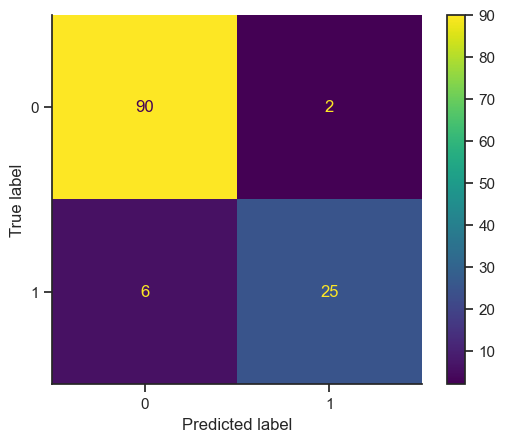

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X_test_energy_sc, y_test_energy);

In [14]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test_energy_sc)

print(classification_report(y_test_energy, y_pred, target_names=['Inefficient', 'Efficient']))

              precision    recall  f1-score   support

 Inefficient       0.94      0.98      0.96        92
   Efficient       0.93      0.81      0.86        31

    accuracy                           0.93       123
   macro avg       0.93      0.89      0.91       123
weighted avg       0.93      0.93      0.93       123



In [15]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning) # Nicht benötigt in diesem Fall

In [16]:
from sklearn.metrics import roc_auc_score

def predict_energy(thresh, returndict=True):
    pred_proba = clf.predict_proba(X_test_energy_sc)
    y_score = pred_proba[:, 1]
    df_thresh = pd.DataFrame({'y_pred': y_score > thresh})



    return (classification_report(y_test_energy, df_thresh['y_pred'], output_dict=returndict, target_names=['Inefficient', 'Efficient']),
            roc_auc_score(y_test_energy, y_score)
            )

Besten threshold bestimmen, nach accuracy werten

In [17]:
thresh_step = 0.01

acc_df = pd.DataFrame(columns=["threshold", "accuracy", "precision", "recall", "f1", "roc_auc"])

for thresh in np.arange(0.0, 1, thresh_step):
    thresh = round(thresh, 3)
    results, roc_auc = predict_energy(thresh)
    
    acc_df.loc[len(acc_df)] = {
        "threshold": thresh,
        "accuracy": results["accuracy"],
        "precision": results["weighted avg"]["precision"],
        "recall": results["weighted avg"]["recall"],
        "f1": results["weighted avg"]["f1-score"],
        "roc_auc": roc_auc
    }


# Beste Accuracy zuerst anzeigen
acc_df.sort_values("accuracy", ascending=False).head(10)

,threshold,accuracy,precision,recall,f1,roc_auc
50,0.50,0.934959,0.934583,0.934959,0.933408,0.928121
53,0.53,0.934959,0.934583,0.934959,0.933408,0.928121
51,0.51,0.934959,0.934583,0.934959,0.933408,0.928121
52,0.52,0.934959,0.934583,0.934959,0.933408,0.928121
46,0.46,0.926829,0.926182,0.926829,0.926427,0.928121
47,0.47,0.926829,0.925756,0.926829,0.925556,0.928121
48,0.48,0.926829,0.925756,0.926829,0.925556,0.928121
49,0.49,0.926829,0.925756,0.926829,0.925556,0.928121
54,0.54,0.918699,0.918779,0.918699,0.915627,0.928121
55,0.55,0.918699,0.918779,0.918699,0.915627,0.928121


In [18]:
alt.Chart(acc_df).mark_line().transform_fold(
    fold=['accuracy', 'precision', "recall", "f1", "roc_auc"], 
    as_=['variable', 'Scale']
).encode(
    x='threshold',
    y='Scale:Q',
    color='variable:N'
).properties(
    width=1000,
    height=400
)

alt.Chart(...)

Werte von bestem Modell

In [19]:
best_thresh = acc_df.loc[acc_df["accuracy"].idxmax(), "threshold"]

print(predict_energy(best_thresh, returndict=False)[0])

              precision    recall  f1-score   support

 Inefficient       0.94      0.98      0.96        92
   Efficient       0.93      0.81      0.86        31

    accuracy                           0.93       123
   macro avg       0.93      0.89      0.91       123
weighted avg       0.93      0.93      0.93       123



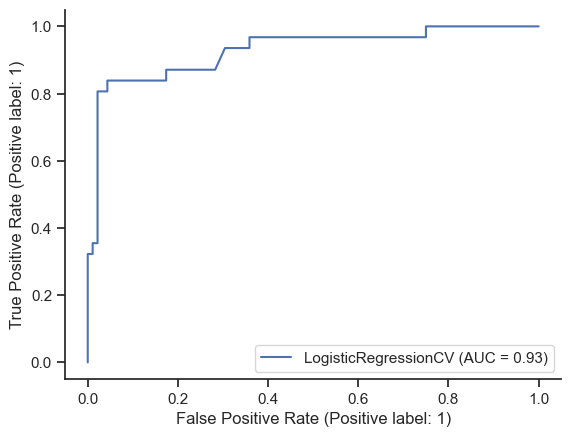

In [20]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test_energy_sc, y_test_energy) ;